In [1]:
import os
%load_ext autoreload
%autoreload 2

""""
Devo code for all kinds of stuff looking st distances in state space, using euclidian dsitnaces.

"""

'"\nDevo code for all kinds of stuff looking st distances in state space, using euclidian dsitnaces.\n\n'

# Load a pre-computed Snippets

In [ ]:
from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper
animal = "Diego"
date = 230928
question = "RULE_BASE_stroke"
which_level = "stroke"
list_time_windows = [(-0.6, 0.6)]
events_keep = ["00_stroke"]

combine_into_larger_areas = False
exclude_bad_areas = True
SPIKES_VERSION = "kilosort_if_exists"
HACK_RENAME_SHAPES = False
# fr_normalization_method = "across_time_bins"
fr_normalization_method = "across_time_bins"
DFallpa = dfallpa_extraction_load_wrapper(animal, date, question, list_time_windows,
                                          which_level=which_level, events_keep=events_keep,
                                          combine_into_larger_areas = combine_into_larger_areas,
                                          exclude_bad_areas = exclude_bad_areas,
                                          SPIKES_VERSION = SPIKES_VERSION,
                                          HACK_RENAME_SHAPES = HACK_RENAME_SHAPES,
                                          fr_normalization_method=fr_normalization_method)

# Load a dataset (saved for Xuan)

To load and plot a dataset of neural activity across population, in a PopAnal class object.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:

# this is the path to the dataset
# path = '/gorilla1/analyses/recordings/main/RSA/Diego-230615/agg_True-subtr_None-dist_euclidian_unbiased/SP_shape_loc/DFallpa.pkl'
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa.pkl"
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_samp_and_stroke.pkl"
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_pig_planning.pkl"
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_pig_concat_trial_and_stroke_which_levels.pkl"
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_char_concat_trial_and_stroke_Pancho_230126.pkl"
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/vDFallpa_Diego_230817_RULE_BASE_stroke.pkl"

# OLDER (before adding all epoch varialbes)
# path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/DFallpa_Pancho_220908_RULE_BASE_stroke.pkl"
# path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/DFallpa_Pancho_220908_RULE_BASE_stroke.pkl"

# NEWER (After adding epoch variables)
# path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/DFallpa_Diego_230823_RULESW_BASE_stroke.pkl"
# path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/DFallpa_Diego_230928_RULE_BASE_stroke.pkl"
# path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/DFallpa_Diego_230910_RULESW_BASE_stroke.pkl" # shape vs. color
# path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/DFallpa_Diego_230911_RULE_BASE_stroke.pkl" #
path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/DFallpa_Diego_230817_RULE_BASE_stroke.pkl" 


In [6]:
DFallpa = pd.read_pickle(path)


##### To save

In [ ]:
# Save it
import pickle
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_char_trial_Pancho_230126.pkl"
# path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/DFallpa_tmp.pkl"
path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/DFallpa_{animal}_{date}_{question}.pkl"

with open(path, "wb") as f:
    pickle.dump(DFallpa, f)
print("Saved to:", path)

# Load a DFallpa

In [ ]:
# Char, 
# animal = "Pancho"
# date = 230126
# do_combine = True

# Single prim, novels
# animal = "Pancho"
# date = 230126
animal = "Diego"
date = 230817
# date = 230817
do_combine = False

if do_combine:
    # COMBINE trial and stroke
    dir_suffix = "test"
    question = None
    # q_params = None
    which_level = None
    q_params = {
        "effect_vars": ["seqc_0_shape", "seqc_0_loc"]
    }
    
    combine_trial_and_stroke = True
    
    # PIG
    # question_trial = "PIG_BASE_trial"
    # question_stroke = "PIG_BASE_stroke"
    # check_that_locs_match = True
    
    # CHAR
    question_trial = "CHAR_BASE_trial"
    question_stroke = "CHAR_BASE_stroke"
    check_that_locs_match = True
    check_that_shapes_match = True
else:
    # DONT COMBINE, use questions.
    # question = "CHAR_BASE_stroke"
    # question = "CHAR_BASE_trial"
    # question = "SP_shape_loc"
    question = "PIG_BASE_stroke"
    # question = "PIG_BASE_trial"
    combine_trial_and_stroke = False
    # which_level = "stroke" # Doesnt matter
    which_level = "stroke" # Doesnt matter
    dir_suffix = question

    # Load q_params
    from neuralmonkey.analyses.rsa import rsagood_questions_dict, rsagood_questions_params
    q_params = rsagood_questions_dict(animal, date, question)[question]

############### PARAMS
exclude_bad_areas = True
SPIKES_VERSION = "tdt" # since Snippets not yet extracted for ks
combine_into_larger_areas = False
HACK_RENAME_SHAPES = False
list_time_windows = [(-0.6, 0.6)]
events_keep = None
fr_normalization_method = "across_time_bins"
########################################## RUN

if combine_trial_and_stroke:
    from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper_combine_trial_strokes
    DFallpa = dfallpa_extraction_load_wrapper_combine_trial_strokes(animal, date, question_trial,
                                                                       question_stroke,
                                                list_time_windows, events_keep=events_keep,
                                               combine_into_larger_areas = combine_into_larger_areas,
                                               exclude_bad_areas=exclude_bad_areas,
                                                SPIKES_VERSION="tdt",
                                                HACK_RENAME_SHAPES = HACK_RENAME_SHAPES,
                                               fr_normalization_method=fr_normalization_method,
                                                    check_that_shapes_match=check_that_shapes_match,
                                                check_that_locs_match=check_that_locs_match)
else:
    from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper
    DFallpa = dfallpa_extraction_load_wrapper(animal, date, question, list_time_windows,
                                              which_level=which_level, events_keep=events_keep,
                                              combine_into_larger_areas = combine_into_larger_areas,
                                              exclude_bad_areas = exclude_bad_areas,
                                              SPIKES_VERSION = SPIKES_VERSION,
                                              HACK_RENAME_SHAPES = HACK_RENAME_SHAPES,
                                              fr_normalization_method=fr_normalization_method)

# Code example for benchmarking: decoding shapes

This step takes in a representation of neural data and outputs a scalar score for how well you can decode "shape" from that data

Here, this example is using the raw data (dimensionality = number of channels). The goal is to use methods to reduce the dimensionality of this data, each time running through this decoding benchmark, to compare the different methods

In [ ]:
pa = DFallpa["pa"].values[0]

In [ ]:
pa.Xlabels["trials"][:2].columns

In [ ]:
from pythonlib.tools.pandastools import grouping_count_n_samples, grouping_append_and_return_inner_items_good, grouping_print_n_samples

# grouping_print_n_samples(pa.Xlabels["trials"], ["epochset", "epoch", "syntax_concrete", "syntax_role", "chunk_rank", "chunk_within_rank", "stroke_index", "shape", "gridloc"])

grouping_print_n_samples(pa.Xlabels["trials"], ["epoch", "syntax_concrete", "syntax_role", "chunk_rank", "chunk_within_rank", "stroke_index", "shape", "gridloc"])


##### First, pull out a specific PA. (just an example)

NOTE: tjhis is just for demonstration. Eventually you will want to loop thru all PA, scoring them all

In [ ]:
from neuralmonkey.classes.population_mult import extract_single_pa


## Make sure to normalize PA before running any modeling on it:

In [ ]:
# from neuralmonkey.classes.population_mult import po
path_to_save_example_fr_normalization = None
fr_normalization_method = "each_time_bin"

if fr_normalization_method is not None:
    if fr_normalization_method=="each_time_bin":
        # Then demean in each time bin indepednently
        subtract_mean_at_each_timepoint = True
        subtract_mean_across_time_and_trial = False
    elif fr_normalization_method=="across_time_bins":
        # ALl time bins subtract the same scalar --> maintains temporal moudlation.
        subtract_mean_at_each_timepoint = False
        subtract_mean_across_time_and_trial = True
    else:
        print(fr_normalization_method)
        assert False

    from neuralmonkey.analyses.state_space_good import popanal_preprocess_scalar_normalization
    list_panorm = []

    for i, pa in enumerate(DFallpa["pa"].tolist()):
        if path_to_save_example_fr_normalization is not None and i==0:
            plot_example_chan_number = pa.Chans[0]
            if which_level=="trial":
                plot_example_split_var_string = "seqc_0_shape"
            elif which_level=="stroke":
                plot_example_split_var_string = "shape"
            else:
                plot_example_split_var_string = q_params["effect_vars"][0]
        else:
            plot_example_chan_number = None
            plot_example_split_var_string = None
        PAnorm, PAscal, PAscalagg, fig, axes, groupdict = popanal_preprocess_scalar_normalization(pa, None,
                                                                                          DO_AGG_TRIALS=False,
                                                                                          plot_example_chan_number=plot_example_chan_number,
                                                                                            plot_example_split_var_string = plot_example_split_var_string,
                                                                                          subtract_mean_at_each_timepoint=subtract_mean_at_each_timepoint,
                                                                                          subtract_mean_across_time_and_trial=subtract_mean_across_time_and_trial)
        if path_to_save_example_fr_normalization is not None and i==0:
            savefig(fig, path_to_save_example_fr_normalization)
        list_panorm.append(PAnorm)
    DFallpa["pa"] = list_panorm


In [ ]:
from pythonlib.globals import PATH_ANALYSIS_OUTCOMES
import os
SAVEDIR_ANALYSIS = f"{PATH_ANALYSIS_OUTCOMES}/recordings/main/DECODE"

In [ ]:
# Figure out how long is seuqence
n_strokes_max = -1
for i in range(2):
    n_ignore = sum(PAnorm.Xlabels["trials"][f"seqc_{i}_shape"]=="IGNORE")
    n_total = len(PAnorm.Xlabels["trials"][f"seqc_{i}_shape"])
    print(n_ignore, n_total)
    if n_ignore<n_total:
        n_strokes_max=i+1
assert n_strokes_max>0
print(n_strokes_max)

### Keep specific events

In [ ]:
DFallpa["event"].unique()
events_keep = ["03_samp", "04_go_cue"]
DFallpa = DFallpa[DFallpa["event"].isin(events_keep)].reset_index(drop=True)

# PREPROCESS - factorize all relevant labels FIRST here.


In [ ]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_vars_conjunctions_extract
dfallpa_preprocess_vars_conjunctions_extract(DFallpa, which_level=which_level)


In [ ]:
dflab = pa.Xlabels["trials"]
sorted([col for col in dflab.columns if "seqc_" in col])

In [ ]:
# Extract all 

In [ ]:
from neuralmonkey.analyses.decode_good import preprocess_factorize_class_labels_ints
MAP_LABELS_TO_INT = preprocess_factorize_class_labels_ints(DFallpa)

# NEW MODULATION SCORE EUCLIDIAN

In [7]:
SAVEDIR_ANALYSIS = "/tmp"
import matplotlib.pyplot as plt
import os
import pandas as pd

In [8]:
#### PARAMS specific to noteobok
# bregions_plot = ["M1_m", "PMd_p", "preSMA_p", "preSMA_a"]
# bregions_plot = ["M1_m", "preSMA_p"]
# bregions_plot = ["M1_m", "preSMA_p", "preSMA_a"]
bregions_plot = ["M1_m", "preSMA_a"]
# bregions_plot = None
NPCS_KEEP = 10

In [ ]:
pa = DFallpa["pa"].values[0]
pa.Xlabels["trials"].loc[::10, ["epochset", "epoch"]]

In [ ]:
# classify if epochset starts with "char"
# New column "epochset_diff_motor"
for pa in DFallpa["pa"].values:
    diff_beh_across_epochs = []
    for i, row in pa.Xlabels["trials"].iterrows():
        if isinstance(row["epochset"], tuple) and row["epochset"][0]=="char":
            diff_beh_across_epochs.append(True)
        elif isinstance(row["epochset"], tuple) and row["epochset"][0]=="same_stroke_0":
            # Diff after first stroke. keep
            diff_beh_across_epochs.append(True)
        elif not isinstance(row["epochset"], tuple):
            diff_beh_across_epochs.append(True)
        else:
            print(row["epochset"])
            diff_beh_across_epochs.append(False)
    pa.Xlabels["trials"]["epochset_diff_motor"] = diff_beh_across_epochs

In [ ]:
pa = DFallpa["pa"].values[0]
pa.Xlabels["trials"].loc[::10, ["epoch", "superv_is_seq_sup", "epoch_orig_rand_seq", "epoch_is_AnBmCk", "INSTRUCTION_COLOR"]]

In [ ]:

pathis = pa.slice_by_labels("trials", ("epoch_orig_rand_seq", "epoch_is_AnBmCk", "INSTRUCTION_COLOR"), [(True, False, True), (False, True, False)])

In [23]:
from neuralmonkey.metadat.analy.anova_params import params_getter_euclidian_vars
question = "RULE_ANBMCK_STROKE"
LIST_VAR, LIST_VARS_OTHERS, LIST_CONTEXT, LIST_PRUNE_MIN_N_LEVS, LIST_FILTDICT = params_getter_euclidian_vars(question)

In [24]:
########################################
SHUFFLE = False
extra_dimred_method = "umap"
umap_n_neighbors = 40



# ################# RUN
# # LIST_FILTDICT = [
# #     filtdict for _ in range(len(LIST_VAR))
# # ]

PLOT = False
PLOT_MASKS = False
nmin_trials_per_lev = 5
PLOT_STATE_SPACE = True
twind = (-0.1, 0.1)
# twind = (-0.4, -0.1)
tbin_dur = 0.1
tbin_slice = tbin_dur

from neuralmonkey.analyses.decode_good import euclidian_distance_compute

list_dfres = []
for i, row in DFallpa.iterrows():
    br = row["bregion"]
    tw = row["twind"]
    ev = row["event"]
    PA = row["pa"]
    
    if bregions_plot is not None:
        if br not in bregions_plot:
            continue

    savedir = f"{SAVEDIR_ANALYSIS}/{br}"
    os.makedirs(savedir, exist_ok=True)
    import warnings
    
    # with warnings.catch_warnings():
    #     warnings.simplefilter('error')
    dfres = euclidian_distance_compute(PA, LIST_VAR, LIST_VARS_OTHERS, PLOT, PLOT_MASKS,
                               twind, tbin_dur, tbin_slice, savedir, PLOT_STATE_SPACE=PLOT_STATE_SPACE,
                                       nmin_trials_per_lev=nmin_trials_per_lev, LIST_CONTEXT=LIST_CONTEXT,
                                       LIST_FILTDICT=LIST_FILTDICT, NPCS_KEEP=NPCS_KEEP, extra_dimred_method=extra_dimred_method, 
                                       umap_n_neighbors = umap_n_neighbors, LIST_PRUNE_MIN_N_LEVS=LIST_PRUNE_MIN_N_LEVS)
    plt.close("all")
    if len(dfres)>0:
        dfres["bregion"] = br
        dfres["twind"] = [tw for _ in range(len(dfres))]
        dfres["event"] = ev

        list_dfres.append(dfres)
DFRES = pd.concat(list_dfres).reset_index(drop=True)

UMAP, Using this n_neighbors: 40 , nsamp = 3822
DIST_NULL_50 4.13244475161214
DIST_NULL_95 8.442443953347915
DIST_NULL_98 8.971824719912057
RUNNING:  0 chunk_within_rank  --  ['epoch', 'syntax_concrete', 'shape']
len pa bnefore filt this values (var, levs):  stroke_index [1, 2, 3, 4, 5, 6, 7, 8, 9]
pa size, before slicing with variable=stroke_index (2, 3822, 1)
... pa size, after slicing with variable=stroke_index (2, 3276, 1)
  Pruning for this var adn conjunction. Original length: 3276 , pruned length: 2848
  Final Scalar data (trial, dims): (2848, 2)
Generating masks using context: {'same': ['epoch', 'syntax_concrete'], 'diff': ['shape']}
Generating masks using context: {'same': ['epoch', 'syntax_concrete'], 'diff': ['shape']}
fig: /tmp/M1_m/color=chunk_within_rank-sub=epoch|syntax_concrete|shape-dims=(0, 1)-0.pdf
Saving ...  /tmp/M1_m/color=chunk_within_rank-sub=epoch|syntax_concrete|shape-dims=(0, 1)-0.pdf
RUNNING:  1 chunk_within_rank  --  ['epoch', 'syntax_concrete', 'shape']
le

In [10]:
# Save all the params
from pythonlib.tools.expttools import writeDictToTxtFlattened
path = f"{SAVEDIR_ANALYSIS}/params_var.txt"
writeDictToTxtFlattened({
    "LIST_VAR":{i:x for i, x in enumerate(LIST_VAR)},
    "LIST_VARS_OTHERS":{i:x for i, x in enumerate(LIST_VARS_OTHERS)},
    "LIST_CONTEXT":{i:x for i, x in enumerate(LIST_CONTEXT)},
    "LIST_PRUNE_MIN_N_LEVS":{i:x for i, x in enumerate(LIST_PRUNE_MIN_N_LEVS)},
    "LIST_FILTDICT":{i:x for i, x in enumerate(LIST_FILTDICT)}}, path)


["LIST_VAR : {0: 'chunk_within_rank', 1: 'chunk_within_rank', 2: 'syntax_role', 3: 'syntax_role', 4: 'syntax_role', 5: 'epoch'}",
 "LIST_VARS_OTHERS : {0: ['epoch', 'syntax_concrete', 'shape'], 1: ['epoch', 'syntax_concrete', 'shape'], 2: ['epoch', 'shape', 'stroke_index'], 3: ['syntax_concrete', 'epoch'], 4: ['syntax_concrete', 'epoch', 'behseq_locs_clust'], 5: ['syntax_concrete', 'syntax_role']}",
 "LIST_CONTEXT : {0: {'same': ['epoch', 'syntax_concrete'], 'diff': ['shape']}, 1: {'same': ['epoch', 'shape'], 'diff': ['syntax_concrete']}, 2: {'same': ['epoch', 'shape'], 'diff': ['stroke_index']}, 3: {'same': ['syntax_concrete'], 'diff': ['epoch']}, 4: {'same': ['syntax_concrete', 'behseq_locs_clust'], 'diff': ['epoch']}, 5: {'same': ['syntax_concrete'], 'diff': ['syntax_role']}}",
 'LIST_PRUNE_MIN_N_LEVS : {0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2}',
 "LIST_FILTDICT : {0: {'stroke_index': [1, 2, 3, 4, 5, 6, 7, 8, 9]}, 1: {'stroke_index': [1, 2, 3, 4, 5, 6, 7, 8, 9]}, 2: {'stroke_index': [1, 

In [11]:
# suffix = "chunkwithin_vs_chunkrank_samesyntax_excludefirstlast_includeeven_ifone_lev"
# suffix = "chunkwithin_vs_chunkrank_anysyntax_excludefirstlast_includeeven_ifone_lev"
suffix = "ALL"
SAVEDIR = f"{SAVEDIR_ANALYSIS}/{suffix}"
import os
os.makedirs(SAVEDIR, exist_ok=True)

In [12]:
DFRES

,var,var_others,effect_samediff,context_samediff,levo,leveff,dist,dat_level,shuffled,shuffled_iter,index_var,DIST_NULL_50,DIST_NULL_95,DIST_NULL_98,bregion,twind,event
0,chunk_within_rank,"(epoch, syntax_concrete, shape)",diff,same,"(llCV3, (1, 4, 2, 0), arcdeep-4-3-0)",ALL,1.655981,distr,False,-1,0,4.176117,8.438670,8.989912,M1_m,"(-0.6, 0.6)",00_stroke
1,chunk_within_rank,"(epoch, syntax_concrete, shape)",diff,same,"(llCV3, (1, 4, 2, 0), line-6-1-0)",ALL,0.604261,distr,False,-1,0,4.176117,8.438670,8.989912,M1_m,"(-0.6, 0.6)",00_stroke
2,chunk_within_rank,"(epoch, syntax_concrete, shape)",diff,same,"(llCV3, (1, 5, 1, 0), line-6-1-0)",ALL,0.584375,distr,False,-1,0,4.176117,8.438670,8.989912,M1_m,"(-0.6, 0.6)",00_stroke
3,chunk_within_rank,"(epoch, syntax_concrete, shape)",diff,same,"(llCV3, (2, 3, 2, 0), arcdeep-4-3-0)",ALL,1.632418,distr,False,-1,0,4.176117,8.438670,8.989912,M1_m,"(-0.6, 0.6)",00_stroke
4,chunk_within_rank,"(epoch, syntax_concrete, shape)",diff,same,"(llCV3, (2, 3, 2, 0), line-6-1-0)",ALL,0.281732,distr,False,-1,0,4.176117,8.438670,8.989912,M1_m,"(-0.6, 0.6)",00_stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,syntax_role,"(syntax_concrete, epoch, behseq_locs_clust)",same,same,"((4, 2, 1, 0), llCV3, 1)",ALL,2.183035,pts,False,-1,4,3.055783,6.081908,6.615175,preSMA_a,"(-0.6, 0.6)",00_stroke
592,syntax_role,"(syntax_concrete, epoch, behseq_locs_clust)",diff,same,"((4, 2, 1, 0), llCV3, 2)",ALL,2.904725,pts,False,-1,4,3.055783,6.081908,6.615175,preSMA_a,"(-0.6, 0.6)",00_stroke
593,syntax_role,"(syntax_concrete, epoch, behseq_locs_clust)",same,same,"((4, 2, 1, 0), llCV3, 2)",ALL,1.983988,pts,False,-1,4,3.055783,6.081908,6.615175,preSMA_a,"(-0.6, 0.6)",00_stroke
594,syntax_role,"(syntax_concrete, epoch, behseq_locs_clust)",diff,same,"((4, 2, 1, 0), llCV3, 3)",ALL,2.722566,pts,False,-1,4,3.055783,6.081908,6.615175,preSMA_a,"(-0.6, 0.6)",00_stroke


### Make summary plots

In [13]:
# Compute normalized distnaces
from pythonlib.tools.pandastools import append_col_with_grp_index
DFRES["dist_norm_98"] = DFRES["dist"]/DFRES["DIST_NULL_98"]
DFRES["dist_norm_95"] = DFRES["dist"]/DFRES["DIST_NULL_95"]
DFRES["dist_norm_50"] = DFRES["dist"]/DFRES["DIST_NULL_50"]
DFRES["var_others"] = [tuple(x) for x in DFRES["var_others"]]
DFRES = append_col_with_grp_index(DFRES, ["index_var", "var", "var_others"], "var_var_others")
DFRES = append_col_with_grp_index(DFRES, ["effect_samediff", "context_samediff"], "effect_context")

In [14]:
# Pivot
from pythonlib.tools.pandastools import pivot_table
DFRES_PIVOT = pivot_table(DFRES, ["var", "var_others", "shuffled", "bregion", "twind", "event", "var_var_others", "dat_level"], ["effect_context"], ["dist_norm_95"], flatten_col_names=True).reset_index(drop=True)

# dfthis = pivot_table(DFRES, ["var", "var_others", "shuffled", "bregion", "twind", "event", "var_var_others"], ["effect_samediff", "context_samediff"], ["dist_norm_95"], flatten_col_names=True).reset_index(drop=True)

DFRES_PIVOT["effect_index"] = DFRES_PIVOT["dist_norm_95-diff|same"] / (DFRES_PIVOT["dist_norm_95-diff|same"] + DFRES_PIVOT["dist_norm_95-same|diff"])
# DFRES_PIVOT["effect_index"] = DFRES_PIVOT["dist_norm_95-diff|same"] / DFRES_PIVOT["dist_norm_95-same|diff"]

DFRES_PIVOT
DFRES_PIVOT_PAIRWISE = DFRES_PIVOT[DFRES_PIVOT["dat_level"] == "pts"].reset_index(drop=True)
DFRES_PIVOT_PAIRWISE["dist_norm_95-same|same"]
DFRES_PIVOT_PAIRWISE["norm_dist_effect"] = DFRES_PIVOT_PAIRWISE["dist_norm_95-diff|same"]-DFRES_PIVOT_PAIRWISE["dist_norm_95-same|same"]
# This makes less sense --> diff|diff can be different for many reasons, emprticlaly doesnt match intuition that well
# DFRES_PIVOT_PAIRWISE["norm_dist_context"] = DFRES_PIVOT_PAIRWISE["dist_norm_95-same|diff"] - DFRES_PIVOT_PAIRWISE["dist_norm_95-diff|diff"]
DFRES_PIVOT_PAIRWISE["norm_dist_context"] = DFRES_PIVOT_PAIRWISE["dist_norm_95-same|diff"] - DFRES_PIVOT_PAIRWISE["dist_norm_95-same|same"]
DFRES_PIVOT_PAIRWISE["norm_dist_both"] = DFRES_PIVOT_PAIRWISE["norm_dist_effect"] - DFRES_PIVOT_PAIRWISE["norm_dist_context"]

# DFRES_PIVOT_PAIRWISE["norm_dist_effect"] = DFRES_PIVOT_PAIRWISE["dist_norm_95-diff|same"]/DFRES_PIVOT_PAIRWISE["dist_norm_95-same|same"] 
# DFRES_PIVOT_PAIRWISE["norm_dist_context"] = DFRES_PIVOT_PAIRWISE["dist_norm_95-same|diff"]/DFRES_PIVOT_PAIRWISE["dist_norm_95-diff|diff"]
# DFRES_PIVOT_PAIRWISE["norm_dist_both"] = DFRES_PIVOT_PAIRWISE["norm_dist_effect"]/DFRES_PIVOT_PAIRWISE["norm_dist_context"]

DFRES_PIVOT_PAIRWISE

,var,var_others,shuffled,bregion,twind,event,var_var_others,dat_level,dist_norm_95-any|diff,dist_norm_95-diff|diff,dist_norm_95-diff|same,dist_norm_95-same|diff,dist_norm_95-same|same,effect_index,norm_dist_effect,norm_dist_context,norm_dist_both
0,chunk_within_rank,"(epoch, syntax_concrete, shape)",False,M1_m,"(-0.6, 0.6)",00_stroke,"0|chunk_within_rank|('epoch', 'syntax_concrete...",pts,0.559938,0.553316,0.226238,0.618813,0.190286,0.267721,0.035951,0.428526,-0.392575
1,chunk_within_rank,"(epoch, syntax_concrete, shape)",False,M1_m,"(-0.6, 0.6)",00_stroke,"1|chunk_within_rank|('epoch', 'syntax_concrete...",pts,0.213899,0.219684,0.226238,0.205450,0.190286,0.524077,0.035951,0.015163,0.020788
2,chunk_within_rank,"(epoch, syntax_concrete, shape)",False,preSMA_a,"(-0.6, 0.6)",00_stroke,"0|chunk_within_rank|('epoch', 'syntax_concrete...",pts,0.566494,0.561953,0.393978,0.585616,0.333102,0.402185,0.060876,0.252514,-0.191638
3,chunk_within_rank,"(epoch, syntax_concrete, shape)",False,preSMA_a,"(-0.6, 0.6)",00_stroke,"1|chunk_within_rank|('epoch', 'syntax_concrete...",pts,0.376351,0.386908,0.393978,0.360661,0.333102,0.522075,0.060876,0.027558,0.033317
4,syntax_role,"(epoch, shape, stroke_index)",False,M1_m,"(-0.6, 0.6)",00_stroke,"2|syntax_role|('epoch', 'shape', 'stroke_index')",pts,0.224263,0.224237,0.217639,0.223943,0.209343,0.492862,0.008296,0.014600,-0.006304
5,syntax_role,"(epoch, shape, stroke_index)",False,preSMA_a,"(-0.6, 0.6)",00_stroke,"2|syntax_role|('epoch', 'shape', 'stroke_index')",pts,0.384041,0.385372,0.352351,0.378464,0.333309,0.482135,0.019042,0.045154,-0.026112
6,syntax_role,"(syntax_concrete, epoch)",False,M1_m,"(-0.6, 0.6)",00_stroke,"3|syntax_role|('syntax_concrete', 'epoch')",pts,NaN,NaN,0.455435,NaN,0.192378,NaN,0.263057,NaN,NaN
7,syntax_role,"(syntax_concrete, epoch)",False,preSMA_a,"(-0.6, 0.6)",00_stroke,"3|syntax_role|('syntax_concrete', 'epoch')",pts,NaN,NaN,0.505707,NaN,0.334833,NaN,0.170873,NaN,NaN
8,syntax_role,"(syntax_concrete, epoch, behseq_locs_clust)",False,M1_m,"(-0.6, 0.6)",00_stroke,"4|syntax_role|('syntax_concrete', 'epoch', 'be...",pts,NaN,NaN,0.480656,NaN,0.191624,NaN,0.289032,NaN,NaN
9,syntax_role,"(syntax_concrete, epoch, behseq_locs_clust)",False,preSMA_a,"(-0.6, 0.6)",00_stroke,"4|syntax_role|('syntax_concrete', 'epoch', 'be...",pts,NaN,NaN,0.519354,NaN,0.321905,NaN,0.197449,NaN,NaN


In [15]:

# SAVE
path = f"{SAVEDIR}/DFRES.pkl"
pd.to_pickle(DFRES, path)
print("Saved to: ", path)

######################################### QUICK PLOT - SUMMARIES
import seaborn as sns
from pythonlib.tools.snstools import rotateLabel
from pythonlib.tools.plottools import savefig
from pythonlib.tools.pandastools import summarize_featurediff

savedir = f"{SAVEDIR}/FIGURES"
os.makedirs(savedir, exist_ok=True)
DFTHIS = DFRES

########## OVERVIEWS
yvar = "dist_norm_95"
for yvarthis in [yvar, "dist", "DIST_NULL_95"]:
    for dat_level in DFTHIS["dat_level"].unique():
        dfthis = DFTHIS[DFTHIS["dat_level"]==dat_level]
        
        fig = sns.catplot(data=dfthis, x="bregion", y=yvarthis, col="var_var_others", hue="effect_context",
                          col_wrap=3, aspect=1.5, alpha=0.4, height=6)
        rotateLabel(fig)
        savefig(fig, f"{savedir}/overview_scatter-{yvarthis}-{dat_level}.pdf")
    
        fig = sns.catplot(data=dfthis, x="bregion", y=yvarthis, col="var_var_others", hue="effect_context",
                          col_wrap=3, aspect=1.5, kind="bar", height=6)
        rotateLabel(fig)
        savefig(fig, f"{savedir}/overview_bar-{yvarthis}-{dat_level}.pdf")
    
        plt.close("all")
        

Saved to:  /tmp/ALL/DFRES.pkl


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


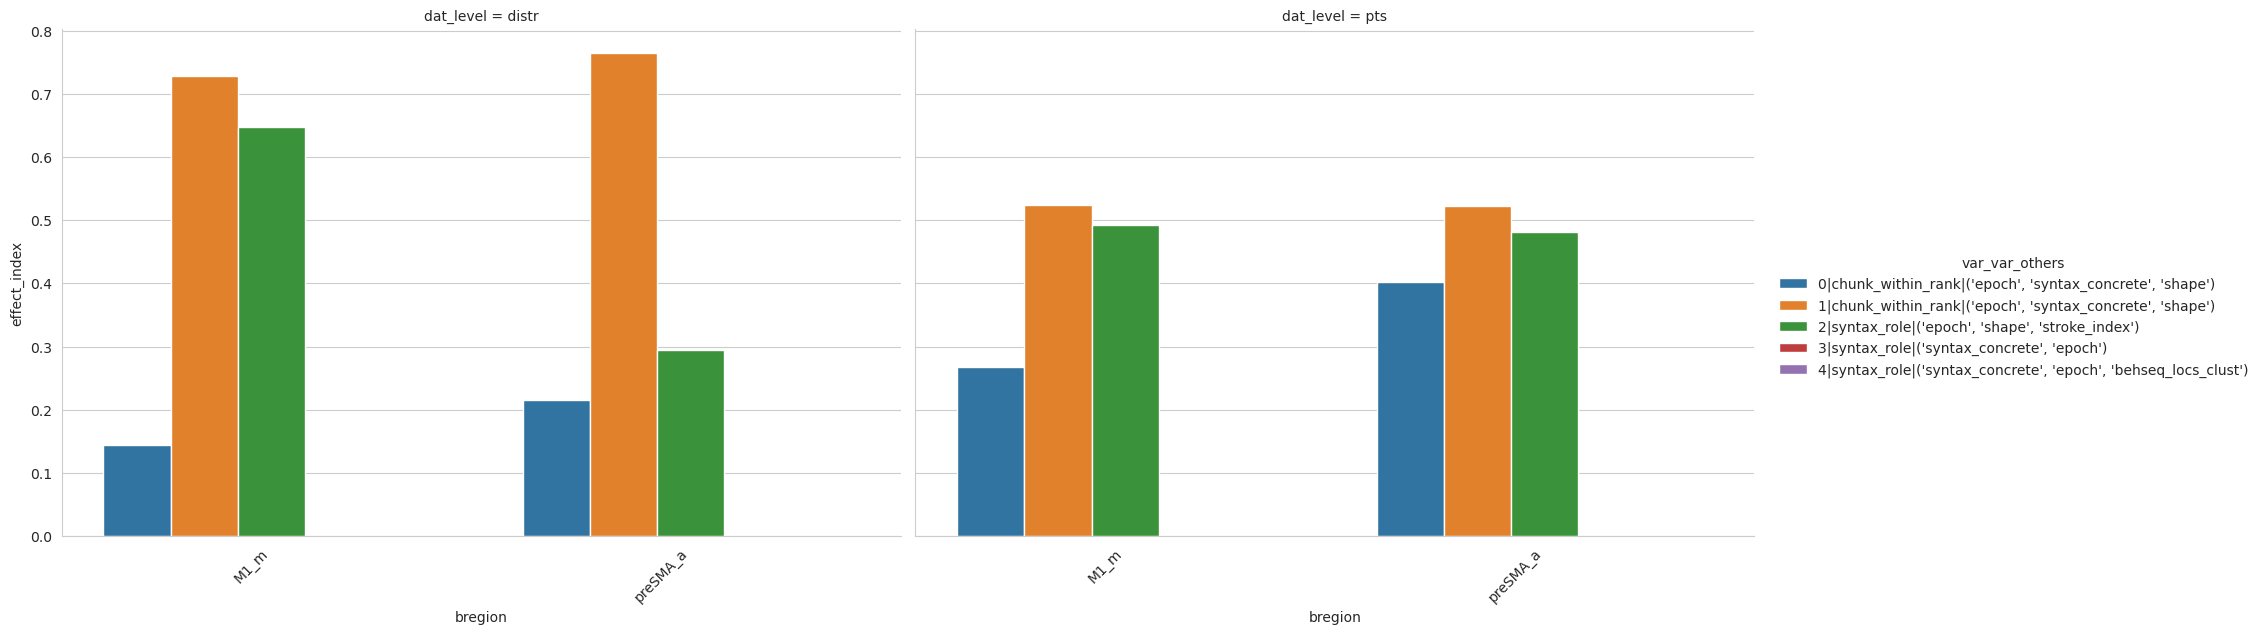

In [16]:
########## OVERVIEWS
yvarthis = "effect_index"
fig = sns.catplot(data=DFRES_PIVOT, x="bregion", y=yvarthis, hue="var_var_others",  aspect=1.5, col="dat_level",
                  height=6, kind="bar")
rotateLabel(fig)
savefig(fig, f"{savedir}/effect_index-bar.pdf")

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


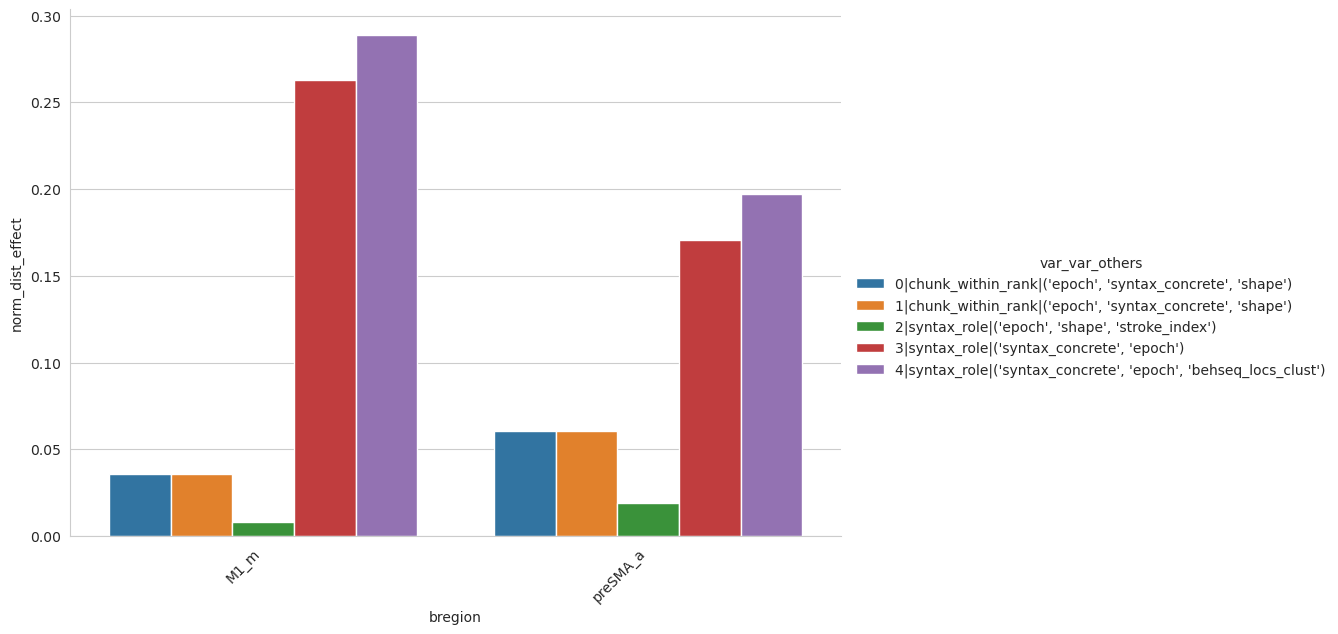

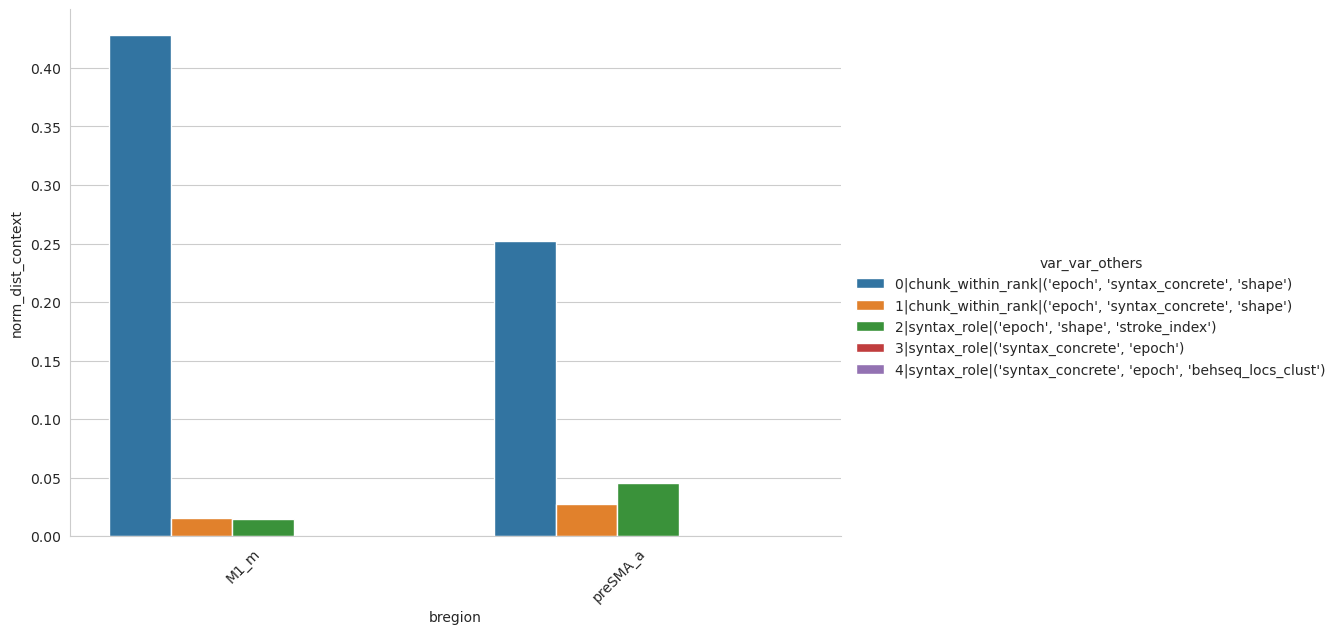

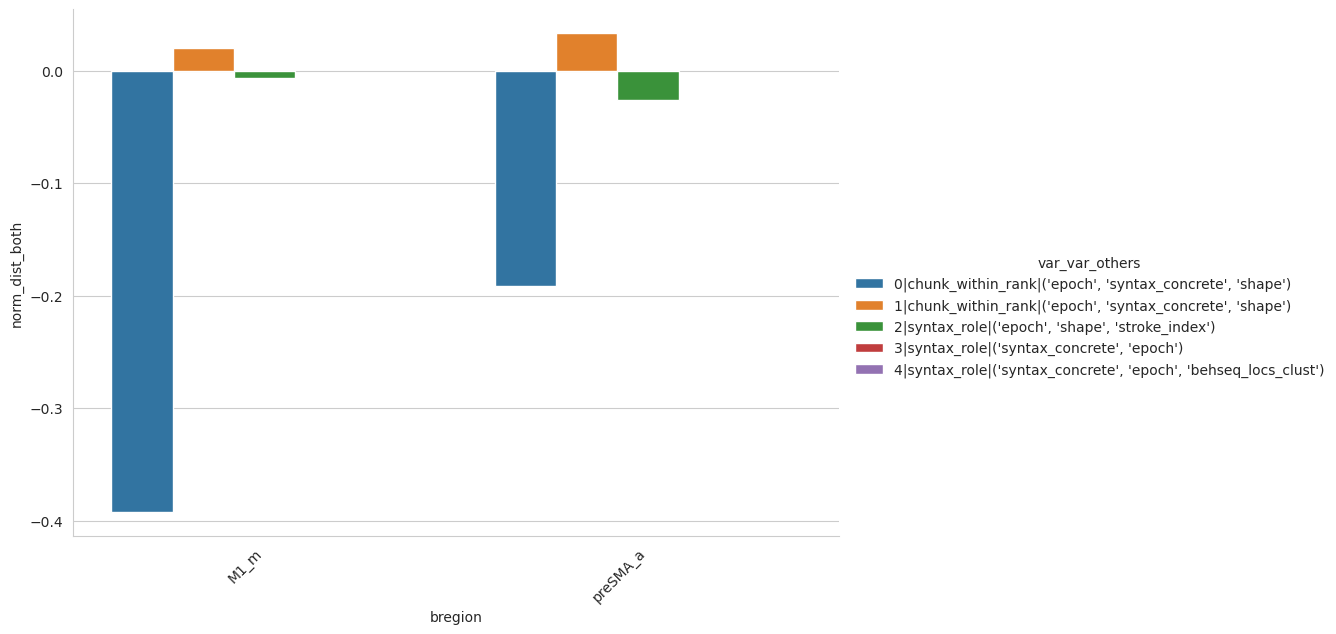

In [17]:
########## OVERVIEWS
for yvarthis in ["norm_dist_effect", "norm_dist_context", "norm_dist_both"]:
    fig = sns.catplot(data=DFRES_PIVOT_PAIRWISE, x="bregion", y=yvarthis, hue="var_var_others",  aspect=1.5, height=6, kind="bar")
    rotateLabel(fig)
    savefig(fig, f"{savedir}/FINAL-{yvarthis}-bar.pdf")
    

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


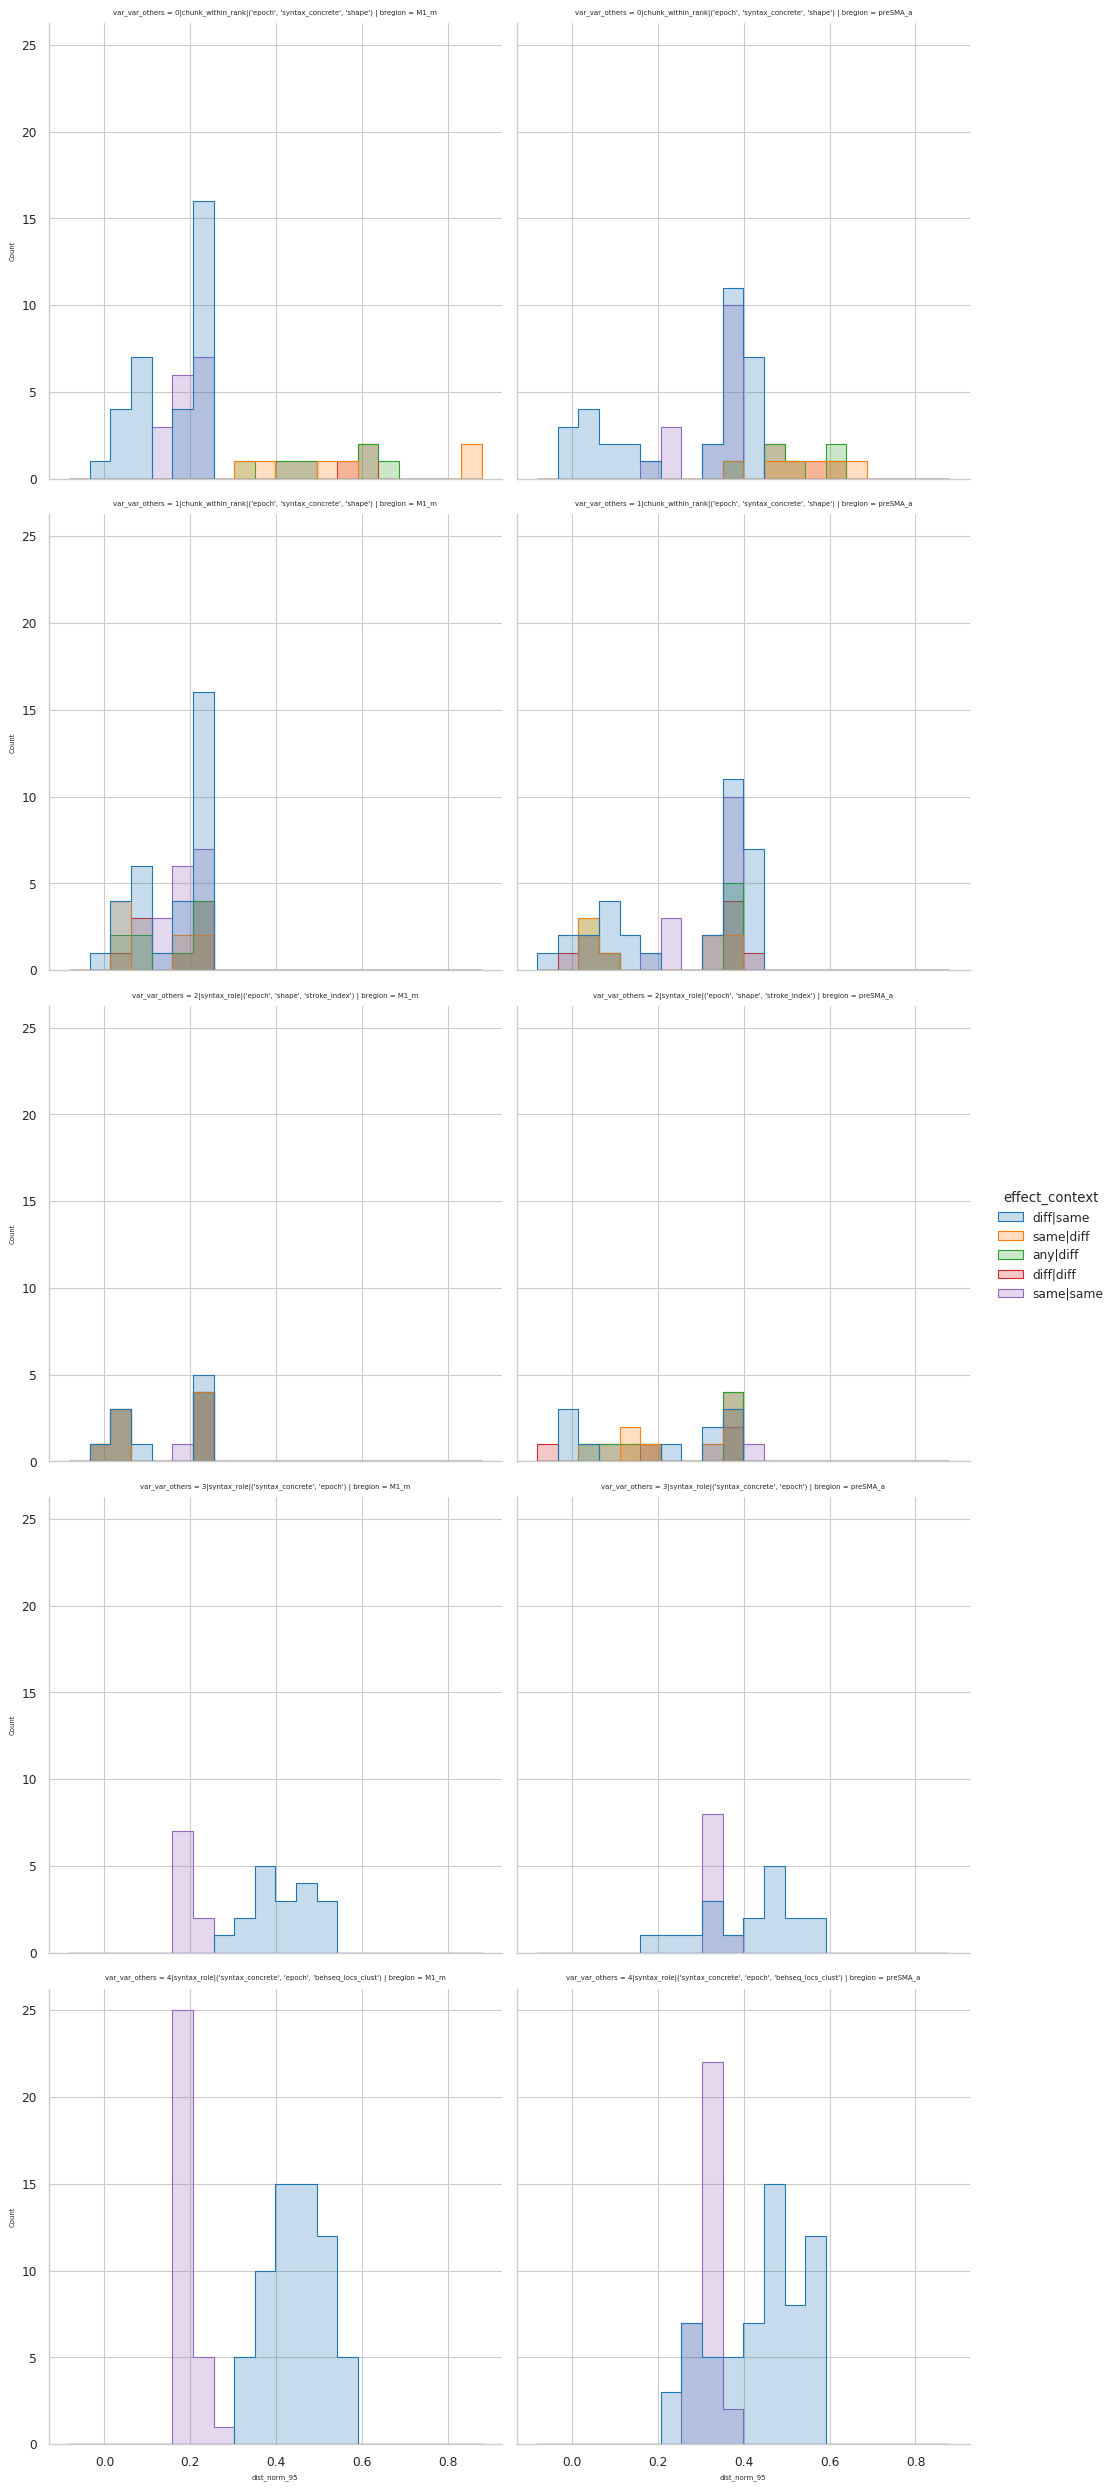

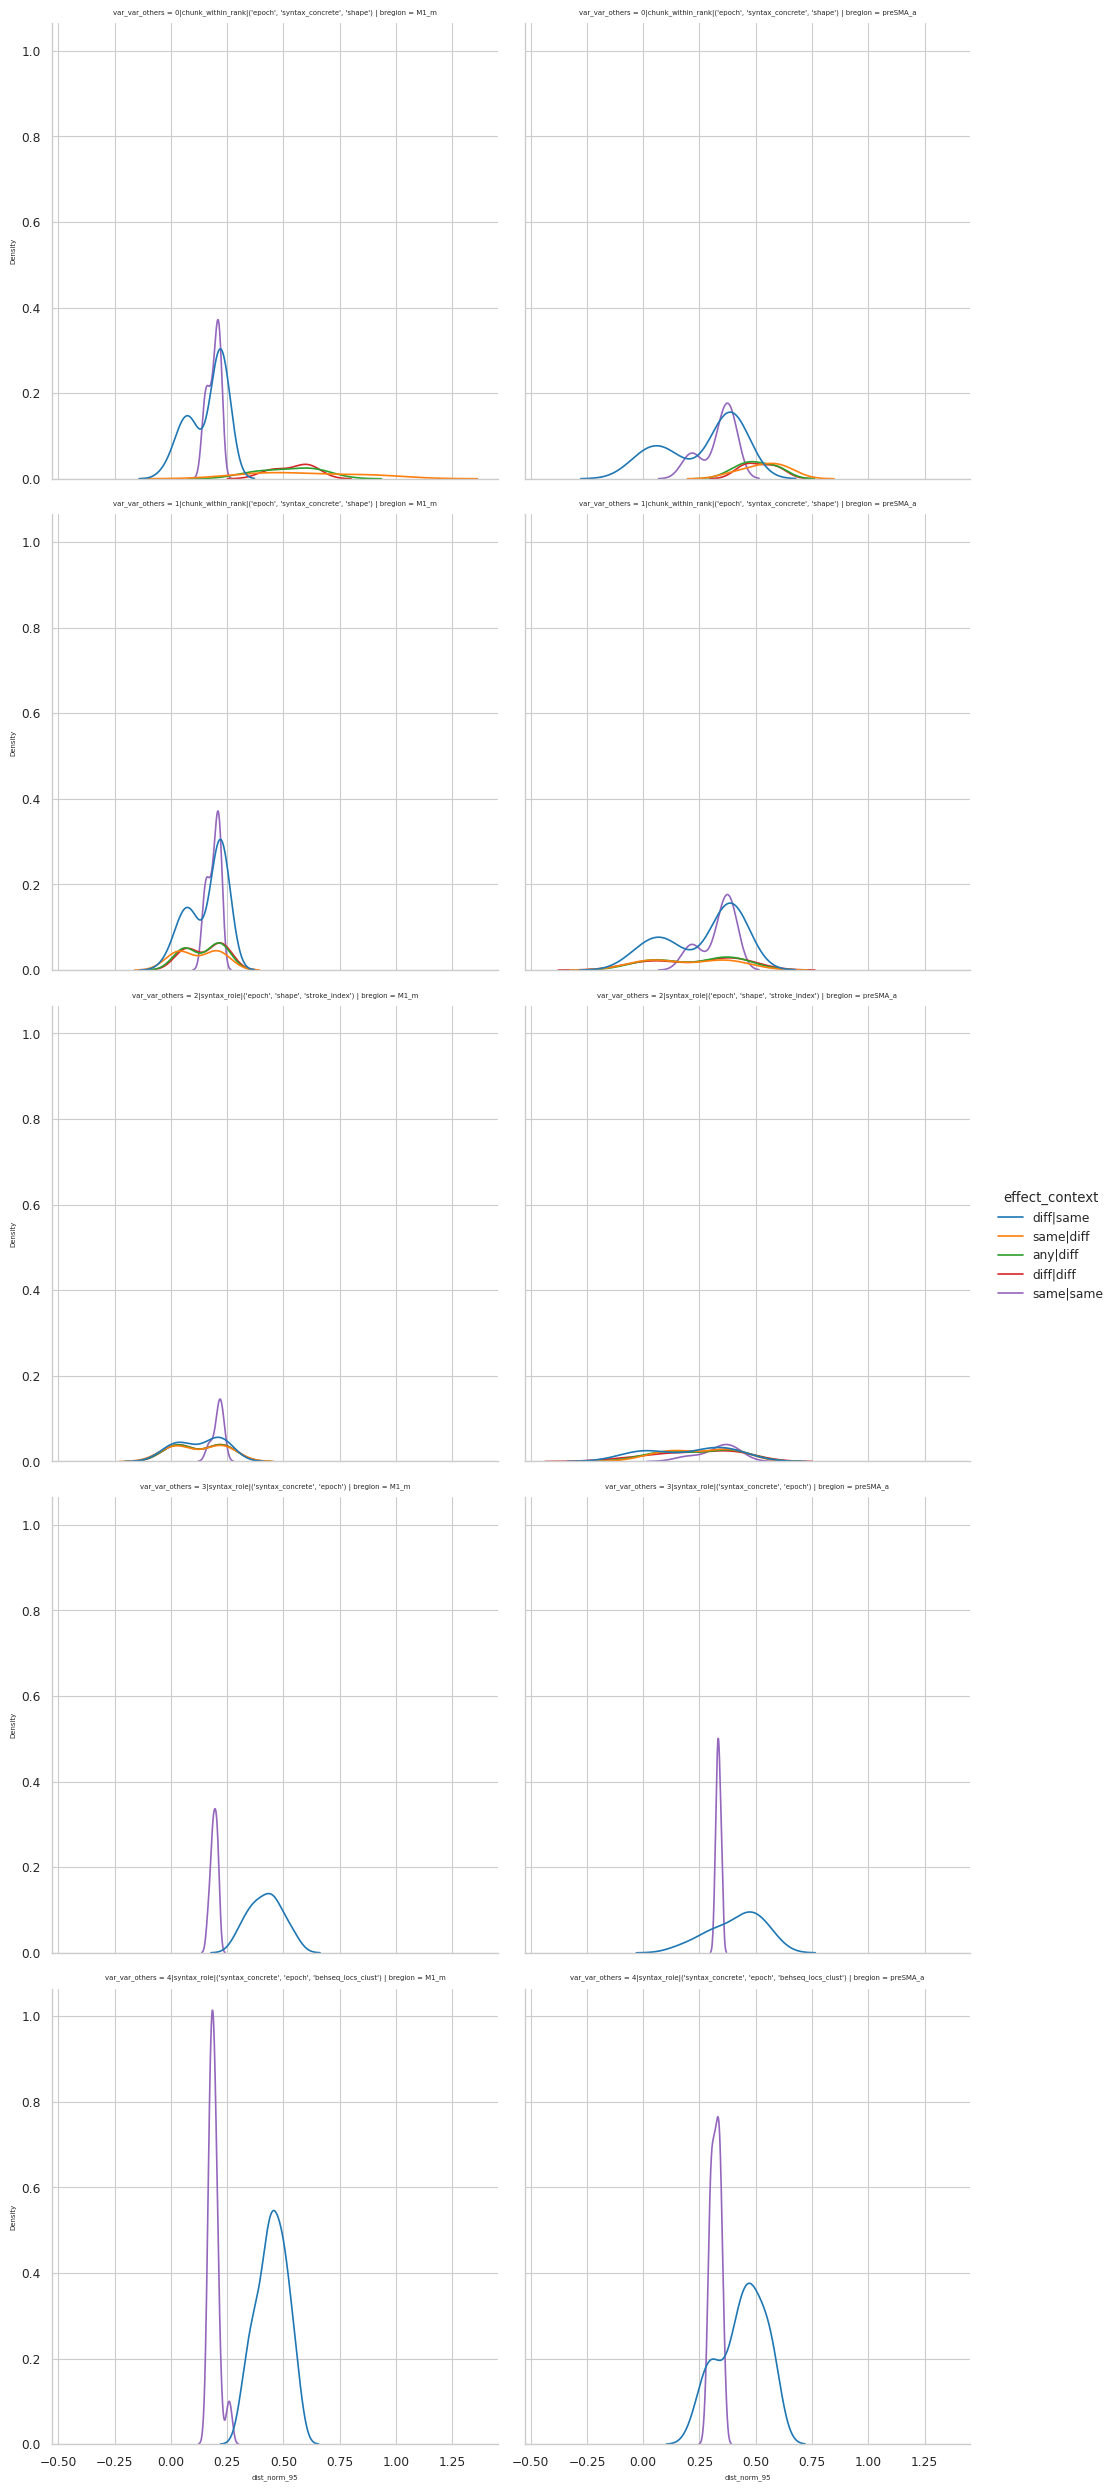

In [18]:
# Plot of histograms, one for each bregion
sns.set_context("paper", rc={"axes.labelsize":5})   
sns.displot(data=DFRES, x="dist_norm_95", hue="effect_context", col="bregion", row="var_var_others", element="step", fill=True, bins=20)
sns.displot(data=DFRES, x="dist_norm_95", hue="effect_context", col="bregion", row="var_var_others", kind="kde", fill=False)

Plotting specific conjucntions heatmaps ... 
...  /tmp/ALL/FIGURES/each_conjunction-effect_context=diff|same-shuffled=False
...  /tmp/ALL/FIGURES/each_conjunction-effect_context=same|diff-shuffled=False
...  /tmp/ALL/FIGURES/each_conjunction-effect_context=any|diff-shuffled=False
...  /tmp/ALL/FIGURES/each_conjunction-effect_context=diff|diff-shuffled=False
...  /tmp/ALL/FIGURES/each_conjunction-effect_context=same|same-shuffled=False


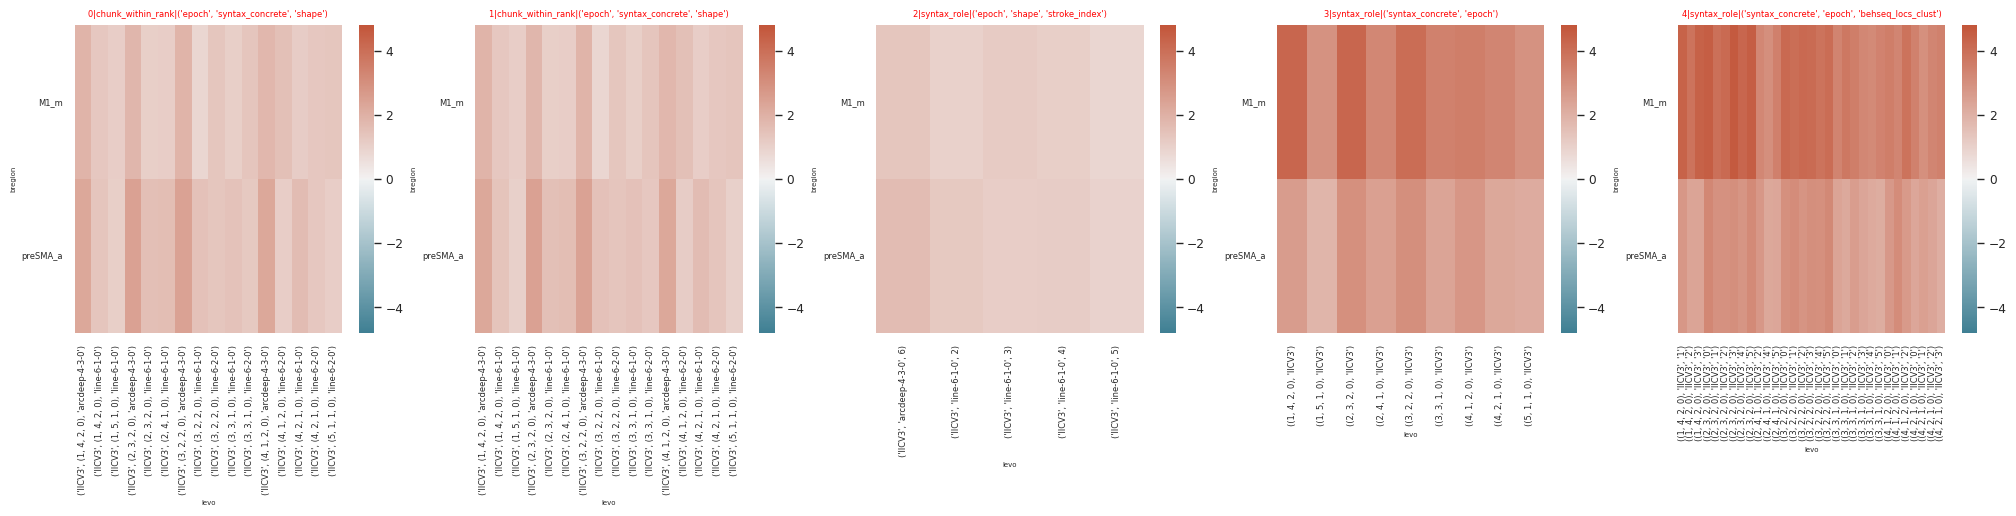

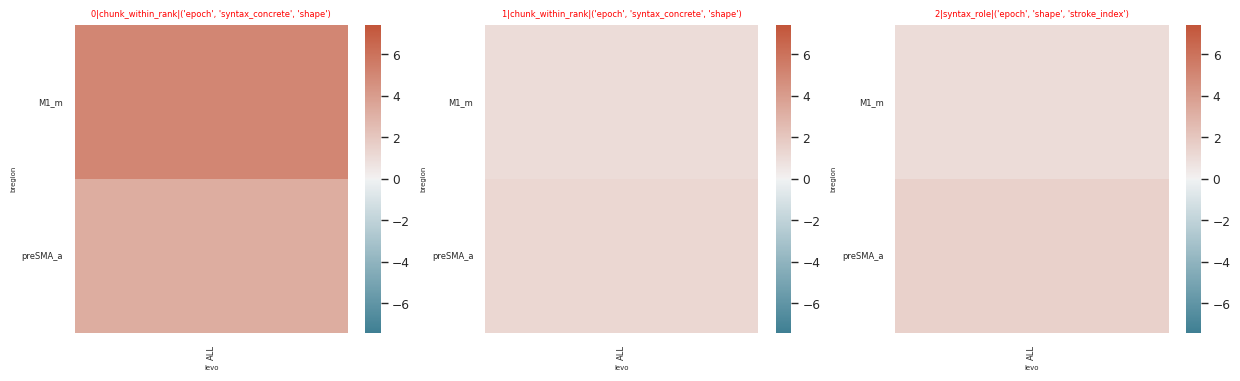

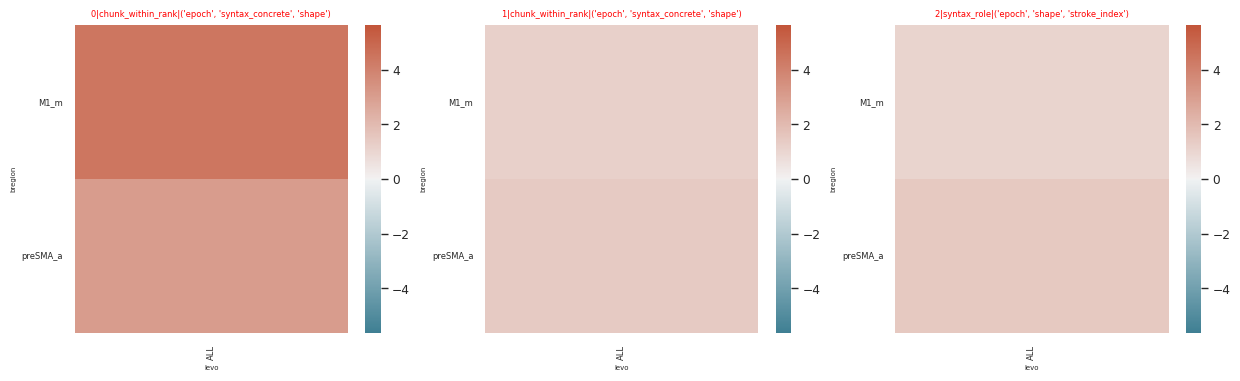

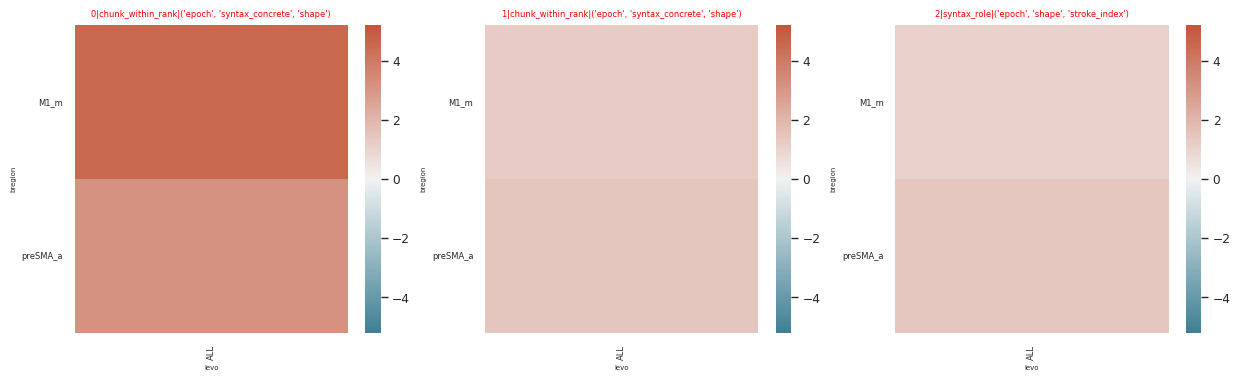

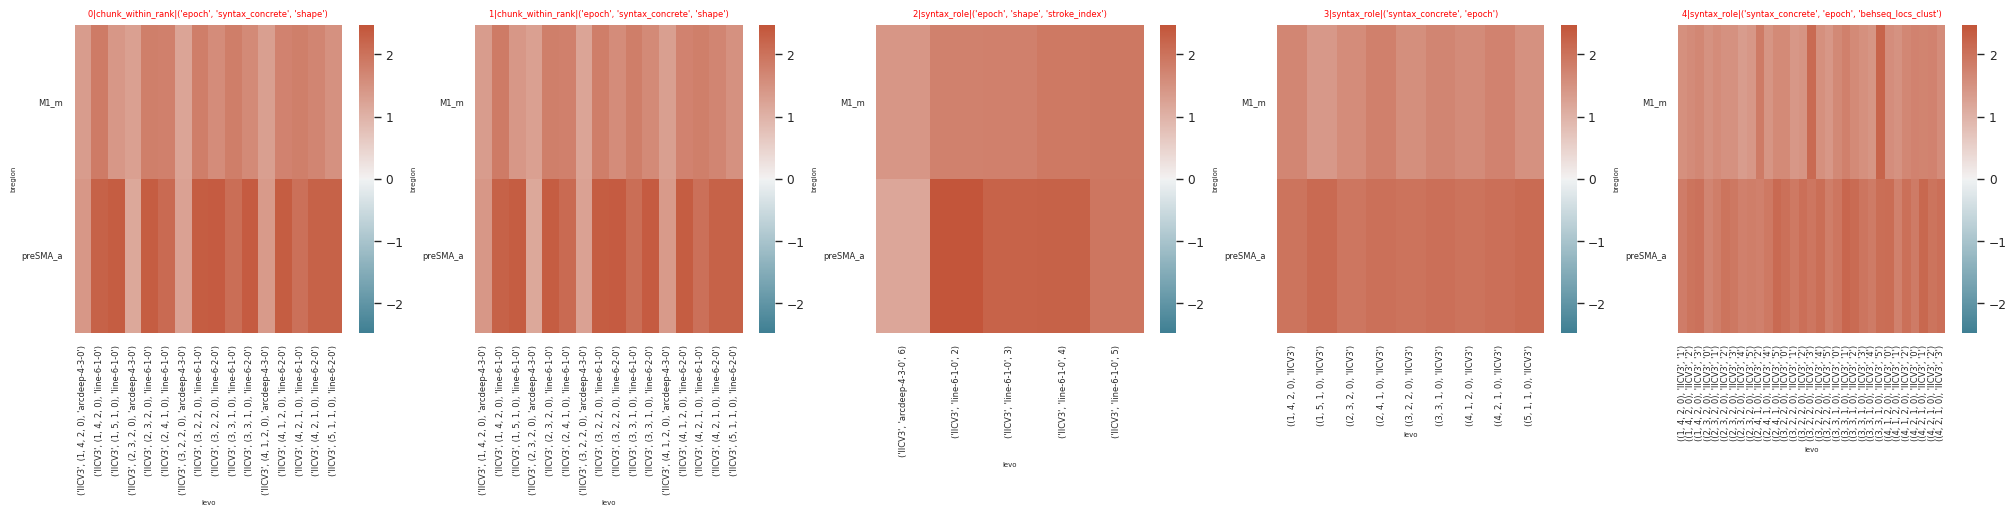

In [19]:
########### PLOT ALL specific conjunction levels in heatmaps
from pythonlib.tools.pandastools import plot_subplots_heatmap
print("Plotting specific conjucntions heatmaps ... ")
yvar = "dist"
list_effect_context = DFTHIS["effect_context"].unique()
list_shuffled = DFTHIS["shuffled"].unique()
for effect_context in list_effect_context:
    for shuffled in list_shuffled:

        dfthis = DFTHIS[(DFTHIS["effect_context"]==effect_context) & (DFTHIS["shuffled"]==shuffled)].reset_index(drop=True)
        savedirthis = f"{savedir}/each_conjunction-effect_context={effect_context}-shuffled={shuffled}"
        os.makedirs(savedirthis, exist_ok=True)
        print("... ", savedirthis)

        # # 1) Scatter
        # list_vvo = dfthis["var_var_others"].unique().tolist()
        # for vvo in list_vvo:
        #     dfthisthis = dfthis[dfthis["var_var_others"]==vvo]
        #     fig = sns.catplot(data=dfthisthis, x=yvar, y="levo", col="bregion", alpha=0.4)
        #     savefig(fig, f"{savedirthis}/allconj_scatter-vvo={vvo}.pdf", height=6)
        #     plt.close("all")

        # 2) Heatmap
        fig, axes = plot_subplots_heatmap(dfthis, "bregion", "levo", yvar, "var_var_others",
                                          diverge=True, ncols=None, share_zlim=True)
        savefig(fig, f"{savedirthis}/allconj_heatmap.pdf")


### OLD PLOTS

##### If using "euclidian", then need to subtract shuffled

In [ ]:
from pythonlib.tools.pandastools import summarize_featurediff

dfsummary, dfsummaryflat, COLNAMES_NOABS, COLNAMES_ABS, COLNAMES_DIFF = summarize_featurediff(DFRES, "shuffled", [True, False], ["dist_norm_95"], ["var_var_others", "var", "var_others", "levo", "bregion", "twind", "event"], return_dfpivot=False)

# summarize_featurediff(DFRES, "bregion", ["M1_m", "M1_l"], ["DIST_NULL_95"], ["var", "var_others"], return_dfpivot=True)


# dfsummary, dfsummaryflat, COLNAMES_NOABS, COLNAMES_ABS, COLNAMES_DIFF = summarize_featurediff(DFRES, "bregion", ["M1_m", "M1_l"], ["DIST_NULL_95"], ["var", "var_others", "levo", "twind", "event"], return_dfpivot=False)


# DFRES[DFRES["shuffled"].isna()==True].index
# DFRES.loc[DFRES["shuffled"].isna(), ["shuffled"]] = False
# # DFRES.loc[DFRES[DFRES["shuffled"].isna()==True].index, ["shuffled"]]

# QUICK PLOT - SUMMARIES
import seaborn as sns
from pythonlib.tools.snstools import rotateLabel
from pythonlib.tools.plottools import savefig

fig = sns.catplot(data=dfsummaryflat, x="bregion", y="value", col="var_var_others", hue="variable", col_wrap=3, aspect=1.5)
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")

# fig = sns.catplot(data=DFRES, x="bregion", y="dist_norm_95", col="var_var_others", hue="shuffled", col_wrap=3,  aspect=1.5, kind="bar", ci=68)
# rotateLabel(fig)
# savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_bar.pdf")


# QUICK PLOT - SUMMARIES
import seaborn as sns
from pythonlib.tools.snstools import rotateLabel
from pythonlib.tools.plottools import savefig

fig = sns.catplot(data=DFRES, x="bregion", y="dist_norm_95", col="var_var_others", hue="shuffled", col_wrap=3, aspect=1.5)
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")

fig = sns.catplot(data=DFRES, x="bregion", y="dist_norm_95", col="var_var_others", hue="shuffled", col_wrap=3,  aspect=1.5, kind="bar", ci=68)
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_bar.pdf")


##### If using euclidian_unbiased, then no need to use shuffled

In [ ]:
# QUICK PLOT - SUMMARIES
import seaborn as sns
from pythonlib.tools.snstools import rotateLabel
from pythonlib.tools.plottools import savefig


In [ ]:
fig = sns.catplot(data=DFRES, x="bregion", y="dist_norm_95", col="var_var_others", hue="effect_samediff", col_wrap=3, aspect=1.5)
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")

fig = sns.catplot(data=DFRES, x="bregion", y="dist_norm_95", col="var_var_others", hue="effect_samediff", col_wrap=3, aspect=1.5, kind="bar")
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")


fig = sns.catplot(data=dfpivot, x="bregion", y="diff_minus_same", col="var_var_others", col_wrap=3, aspect=1.5)
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")

fig = sns.catplot(data=dfpivot, x="bregion", y="diff_minus_same", col="var_var_others", col_wrap=3, aspect=1.5, kind="bar")
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")

fig = sns.catplot(data=dfpivot, x="bregion", y="diff_divide_same", col="var_var_others", col_wrap=3, aspect=1.5)
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")

fig = sns.catplot(data=dfpivot, x="bregion", y="diff_divide_same", col="var_var_others", col_wrap=3, aspect=1.5, kind="bar")
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")



In [ ]:
### Inspect specific conjunctions --> evaluate method
list_vvo = DFRES["var_var_others"].unique().tolist()
for vvo in list_vvo:
    dfthis = DFRES[DFRES["var_var_others"]==vvo]
    # sns.catplot(data=dfthis, x="bregion", y="dist_norm_95", col="levo", col_wrap=3)
    fig = sns.catplot(data=dfthis, x="dist_norm_95", y="levo", col="bregion")
    savefig(fig, f"{SAVEDIR_ANALYSIS}/allconj_scatter-vvo={vvo}.pdf")
    plt.close("all")
from pythonlib.tools.pandastools import plot_subplots_heatmap
# fig, axes = plot_subplots_heatmap(DFRES, "levo", "bregion", "dist_norm_95", "var_var_others", diverge=True)
fig, axes = plot_subplots_heatmap(DFRES, "bregion", "levo", "dist_norm_95", "var_var_others", diverge=True, ncols=None, share_zlim=True)
savefig(fig, f"{SAVEDIR_ANALYSIS}/allconj_heatmap.pdf")

### Plot the raw data 

In [ ]:
"/tmp/tmp"

In [ ]:
PA = DFallpa["pa"].values[2]

In [ ]:
list_Xpcakeep = []
list_pa = []
for method in ["sklearn", "svd"]:
    Xpcakeep, pa = PA.dataextract_state_space_decode_flex(twind_overall=(-0.25, 0.25), tbin_dur=0.1, reshape_method = "trials_x_chanstimes", pca_reduce=True, plot_pca_explained_var_path=f"/tmp/tmp_expvar-{method}.png", plot_loadings_path=f"/tmp/tmp_loadings-{method}.png", pca_method=method)
    
    list_pa.append(pa)
    list_Xpcakeep.append(Xpcakeep)

In [ ]:
np.all(list_pa[0].X == list_pa[1].X)

In [ ]:
import numpy as np
np.all(list_Xpcakeep[0] - list_Xpcakeep[1]<0.001)

In [ ]:
list_Xpcakeep[0]

In [ ]:
list_Xpcakeep[1]

In [ ]:
# State space, after PCA

###### Devo - distance between contexts

In [ ]:
from neuralmonkey.analyses.rsa import _rsagood_convert_PA_to_Cl
PAscal = PA.agg_wrapper("times")
Clraw, Clsim = _rsagood_convert_PA_to_Cl(PAscal, [var]+var_others+["stroke_index"], "euclidian_unbiased", DO_AGG_TRIALS=False)


In [ ]:
Clsim.rsa_plot_heatmap()

In [ ]:
    LIST_VAR = [
        "CTXT_loc_next",
        "CTXT_loc_next",
        "CTXT_loc_next",
        "CTXT_shape_next",
        "CTXT_shape_next",

        "task_kind",
        "stroke_index",
        "stroke_index_fromlast_tskstks",
        "FEAT_num_strokes_task",

        "shape",
        "shape",
        "gridloc",
        "gridloc",
    ]
    # More restrictive
    LIST_VARS_OTHERS = [
        ["stroke_index_is_first", "task_kind", "CTXT_loc_prev", "shape", "gridloc"],
        ["stroke_index_is_first", "task_kind", "CTXT_loc_prev", "shape", "gridloc", "CTXT_shape_next"],
        ["stroke_index_is_first", "task_kind", "CTXT_shape_prev", "CTXT_loc_prev", "shape", "gridloc", "CTXT_shape_next"],
        ["stroke_index_is_first", "task_kind", "CTXT_loc_prev", "shape", "gridloc", "CTXT_loc_next"],
        ["stroke_index_is_first", "task_kind", "CTXT_shape_prev", "CTXT_loc_prev", "shape", "gridloc", "CTXT_loc_next"],

        ["stroke_index_is_first", "shape", "gridloc", "CTXT_shape_prev", "CTXT_loc_prev"],
        ["stroke_index_is_first", "task_kind", "CTXT_shape_prev", "CTXT_loc_prev", "shape", "gridloc"],
        ["stroke_index_is_first", "task_kind", "CTXT_shape_prev", "CTXT_loc_prev", "shape", "gridloc"],
        ["stroke_index_is_first", "task_kind", "CTXT_loc_prev", "shape", "gridloc", "stroke_index"],

        ["stroke_index_is_first", "task_kind", "gridloc", "CTXT_shape_prev", "CTXT_loc_prev", "CTXT_loc_next"],
        ["stroke_index_is_first", "task_kind", "gridloc", "CTXT_shape_prev", "CTXT_loc_prev"],
        ["stroke_index_is_first", "task_kind", "shape", "CTXT_shape_prev", "CTXT_loc_prev", "CTXT_loc_next"],
        ["stroke_index_is_first", "task_kind", "shape", "CTXT_shape_prev", "CTXT_loc_prev"],
        ]

    assert len(LIST_VAR)==len(LIST_VARS_OTHERS)


In [ ]:

# Clsim.rsa_matindex_same_diff_mult_var_flex([var], var_others, PLOT=True, lenient_diff=True);
Clsim.rsa_mask_context_helper(var, var_others+["stroke_index"], "diff_specific_lenient", 
                              ["stroke_index"], var_others, True);

In [ ]:
# Clsim.rsa_matindex_same_diff_mult_var_flex([var], var_others, PLOT=True, lenient_diff=True);
Clsim.rsa_mask_context_helper(var, var_others+["stroke_index"], "diff_specific", 
                              ["stroke_index"], var_others, True);

In [ ]:
PLOT_MASKS=True
MASKS, fig, axes = Clsim.rsa_mask_context_helper(var, var_others, "diff_at_least_one", PLOT=PLOT_MASKS)

# Get same effect diff context
ma = MASKS["effect_same"] & MASKS["context_diff"]

# any effect, diff context
ma = MASKS["context_diff"]


### Devo - null from shuffle

In [ ]:
DFallpa

In [ ]:
PA = DFallpa["pa"].values[10]

In [ ]:
twind = (-0.2, 0.2)
tbin_dur = 0.1
tbin_slide = 0.1
X, PApca, PAslice, pca = PA.dataextract_state_space_decode_flex(twind, tbin_dur, tbin_slice, reshape_method="trials_x_chanstimes",
                                       pca_reduce=True)


In [ ]:
print(X.shape, PApca.X.shape, PAslice.X.shape)

In [ ]:
var = "shape"
var_others = ["task_kind", "gridloc"]


In [ ]:
# Create clusters
from pythonlib.cluster.clustclass import Clusters

label_vars = [var]+var_others
dflab = pa.Xlabels["trials"]
assert len(dflab)==Xthis.shape[0]
print("  Final Scalar data (trial, dims):", Xthis.shape)
labels_rows = dflab.loc[:, label_vars].values.tolist()
labels_rows = [tuple(x) for x in labels_rows] # list of tuples
if SHUFFLE:
    import random
    random.shuffle(labels_rows)
params = {
    "label_vars":label_vars,
}
Cl = Clusters(Xthis, labels_rows, ver="rsa", params=params)

In [ ]:
# OLD METHOD, using unbiased
# convert to distance matrix
version_distance = "euclidian_unbiased"
Cldist = Cl.distsimmat_convert_distr(label_vars, version_distance, accurately_estimate_diagonal=False)
# version_distance = "pearson"
# Cldist = Cl.distsimmat_convert(version_distance)
if PLOT:
    Cldist.rsa_plot_heatmap()


In [ ]:
pa.X.shape
PApca.X.shape

In [ ]:
# New method -- shuffling
from pythonlib.tools.pandastools import shuffle_dataset_hierarchical
# from neuralmonkey.metrics.scalar import _shuffle_dataset_hier

dflab = PApca.Xlabels["trials"].copy()
dflab_shuff_1 = shuffle_dataset_hierarchical(dflab, [var], var_others)
# dflab_shuff_2 = _shuffle_dataset_hier(dflab, var_others, [var])
# dflab_shuff_2 = _shuffle_dataset_hier(dflab, ["task_kind"], ["shape", "gridloc"])



In [ ]:
print(np.all(dflab["trialcode"] == dflab_shuff_1["trialcode"]))
# print(np.all(dflab["trialcode"] == dflab_shuff_2["trialcode"]))


In [ ]:
from pythonlib.tools.pandastools import shuffle_dataset_hierarchical

var = "shape"
var_others = ["task_kind", "gridloc"]
n_shuff = 3

res = []
DOSHUFFLE = True
for i_shuff in range(n_shuff):
    
    # 0. shuffle
    PApcaSHUFF = PApca.copy()
    if DOSHUFFLE:
        dflab = PApcaSHUFF.Xlabels["trials"].copy()
        dflabSHUFF = shuffle_dataset_hierarchical(dflab, [var], var_others)
        PApcaSHUFF.Xlabels["trials"] = dflabSHUFF

    
    # 1. agg before computing distances (quicker)
    pa_agg = PApcaSHUFF.slice_and_agg_wrapper("trials", [var]+var_others)
    
    # 2. Make clusters
    # Create clusters
    label_vars = [var]+var_others
    dflab = pa_agg.Xlabels["trials"]
    labels_rows = dflab.loc[:, label_vars].values.tolist()
    labels_rows = [tuple(x) for x in labels_rows] # list of tuples
    if SHUFFLE:
        import random
        random.shuffle(labels_rows)
    params = {
        "label_vars":label_vars,
    }
    Xthis = pa_agg.X.squeeze(axis=2).T # (ntrials, ndims)
    
    Cl = Clusters(Xthis, labels_rows, ver="rsa", params=params)
    Cldist = Cl.distsimmat_convert("euclidian")
    if False:
        Cldist.rsa_plot_heatmap()
    PLOT_MASKS=False
    MASKS, fig, axes = Cldist.rsa_mask_context_helper(var, var_others, "diff_at_least_one", PLOT=PLOT_MASKS)
    # Compute score
    # 1. Within each context, average pairwise distance between levels of effect var
    map_grp_to_mask = Cldist.rsa_mask_context_split_levels_of_conj_var(var_others, PLOT=PLOT_MASKS)
    # For each levo, compute mean distance
    for grp, ma in map_grp_to_mask.items():
        ma_final = ma & MASKS["effect_diff"]
        dist = Cldist.Xinput[ma_final].mean()
        res.append({
            "var":var,
            "var_others":var_others,
            "levo":grp,
            "dist":dist,
            "i_shuff":i_shuff,
            # "dist_norm_95":dist/DIST_NULL_95,
            # "dist_norm_50":dist/DIST_NULL_50
        })

In [ ]:
pd.DataFrame(res)

In [ ]:
pd.DataFrame(res)

In [ ]:
MASKS, _, _ = Cldist.rsa_mask_context_helper(var, var_others, "diff_at_least_one")

In [ ]:
MASKS.keys()

In [ ]:
Cldist.Labels

In [ ]:
X = np.stack([row["Stroke"]()[0,:2] for i, row in pa.Xlabels["trials"].iterrows()])

In [ ]:
from pythonlib.tools.statstools import kmeans_with_silhouette_score

kmeans_with_silhouette_score(X, n_clusters_min_max=[3, 15], PLOT=True)

### Loading euclidian distance results

In [ ]:
path = "/gorilla1/analyses/recordings/main/EUCLIDIAN_DIST/Pancho-230620/PIG_BASE_stroke-fr_normalization_method=across_time_bins-NPCS_KEEP=10/twind_analy=(-0.1, 0.1)-tbin_dur=0.1/DFRES.pkl"
import pandas as pd
DFRES = pd.read_pickle(path)
DFTHIS = DFRES


In [ ]:
DFRES[:10]

In [ ]:
effect_context = "diff|same"
shuffled=False
yvar = "dist"
from pythonlib.tools.pandastools import plot_subplots_heatmap

dfthis = DFTHIS[(DFTHIS["effect_context"]==effect_context) & (DFTHIS["shuffled"]==shuffled)].reset_index(drop=True)
# savedirthis = f"{savedir}/each_conjunction-effect_context={effect_context}-shuffled={shuffled}"
# os.makedirs(savedirthis, exist_ok=True)
# print("... ", savedirthis)

# # 1) Scatter
# list_vvo = dfthis["var_var_others"].unique().tolist()
# for vvo in list_vvo:
#     dfthisthis = dfthis[dfthis["var_var_others"]==vvo]
#     fig = sns.catplot(data=dfthisthis, x=yvar, y="levo", col="bregion", alpha=0.4)
#     # savefig(fig, f"{savedirthis}/allconj_scatter-vvo={vvo}.pdf")
#     plt.close("all")


# 2) Heatmap
fig, axes = plot_subplots_heatmap(dfthis, "bregion", "levo", yvar, "var_var_others",
                                  diverge=True, ncols=None, share_zlim=True)


In [ ]:
dfthis

In [ ]:
dfthis["levo"]

In [ ]:
type(int(xx))

In [ ]:
import numpy as np
for x in dfthis["levo"].unique().tolist():
    for xx in x:
        
        print(type(xx))
        if type(xx)==np.int64:
            asdfasdf

In [ ]:
from pythonlib.tools.pandastools import grouping_append_and_return_inner_items
# grouping_append_and_return_inner_items(dfthis, ["bregion", "levo", "var_var_others"])
grouping_append_and_return_inner_items(dfthis, ["bregion", "var_var_others"])


In [ ]:
dfthis

In [ ]:
grp.index

In [ ]:
for i, grp in dfthis.groupby(["bregion", "var_var_others"]):
    print(i)
    print

In [ ]:
grouping_append_and_return_inner_items(dfthis, ["bregion", "var_var_others"])


In [ ]:
dfthis["effect_context"]
